<a href="https://colab.research.google.com/github/Risshabh-ML/Vectorized-FNN-Performace_measure/blob/main/Sigmoid_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#**sigmoid Function ploting in 3D and 2d space**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

* *%matplotthelib inline will make your plot outputs appear and be stored within the notebook* 

$Sigmoid_{w,b}=\frac{1}{1+e^{-(w.x+b)}}$

In [ ]:
def sigmoid(w,b,x):
  return 1/(1+np.exp(-(w*x+b))) 

In [ ]:
sigmoid(1,0.5,0)


0.6224593312018546

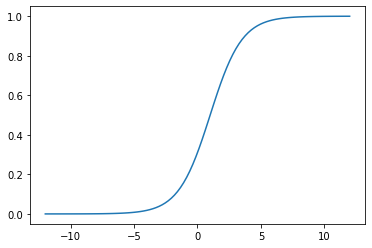

In [ ]:
w=0.8   #@param {type: "slider", min: -2, max: 2,step:0.1}
b=-0.8 #@param {type: "slider", min: -2, max: 2,step:0.1}
X=np.linspace(-12,+12,100)
#print(x)
Y=sigmoid(w,b,X)
plt.plot(X,Y)
plt.show()

$Sigmoid_{w1,x1.w2,x2}=\frac{1}{1+e^{-{w1.x1+w2.x2+b}}}$

In [ ]:
def sigmoid_2d(w1,w2,x1,x2,b):
  return 1.0/(1+np.exp(-(w1*x1+w2*x2+b)))



In [ ]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

**sigmoid funtion ploting in 3d space**

In [ ]:
from mpl_toolkits import mplot3d


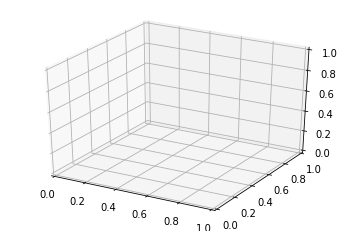

In [ ]:
fig=plt.figure()
ax=plt.axes(projection='3d')

In [ ]:

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
xx1,xx2=np.meshgrid(x1,x2)
print(xx1.shape,xx2.shape)
w1=0.5         #@param {type: "slider", min: -2, max: 2,step:0.1}
w2=0.5           #@param {type: "slider", min: -2, max: 2,step:0.1}
b=0            #@param {type: "slider", min: -2, max: 2,step:0.1}
Y=sigmoid_2d(xx1,xx2,w1,w2,b)


(100, 100) (100, 100)


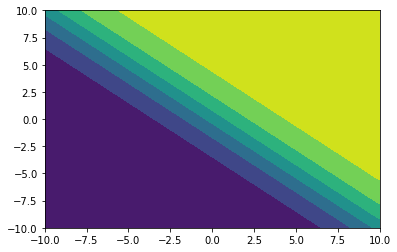

In [ ]:
plt.contourf(xx1, xx2, Y)
plt.show()

*mesgrid=1D- 2D array*

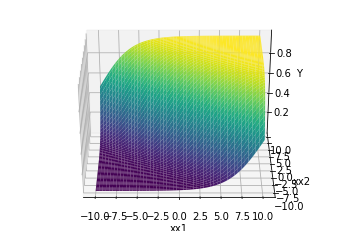

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, Y,cmap='viridis', edgecolor='none')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('Y');
ax.view_init(30, 270)


# **Compute Loss for a given dataset or find the minimum value w And b**

In [ ]:
W_unknown=0.5
b_unknown=0.25
X=np.random.random(25) * 20 - 10
Y=sigmoid(W_unknown,b_unknown,X)



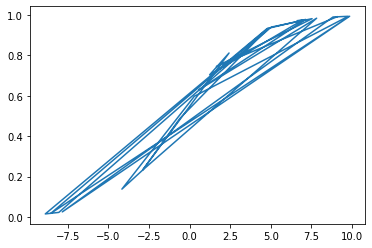

In [ ]:
plt.plot(X,Y)
plt.show()

In [ ]:
def calculate_loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(w_est,b_est,x))**2
  return loss  


In [ ]:
W=np.linspace(0,2,100)
B=np.linspace(-1,1,100)
WW,BB=np.meshgrid(W,B)
loss=np.zeros(WW.shape)
print(loss.shape)
print(WW.shape)

(100, 100)
(100, 100)


In [ ]:
for i in range(WW.shape[0]):
  for j in  range(BB.shape[1]):
    loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])

Text(0.5, 0, 'loss')

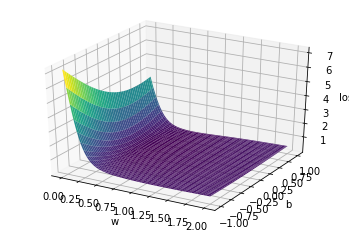

In [ ]:
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB, loss,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
#ax.view_init(30, 180)


In [ ]:
ij=np.argmin(loss)
i=int(np.floor(ij/loss.shape[1]))
j=int(ij-i*loss.shape[1])

In [ ]:
print(i,j)

62 25


In [ ]:
print(WW[i,j],BB[i,j])

0.5050505050505051 0.2525252525252526


#  Sigmoid **Class**

## Fit For Toy Data

In [ ]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [ ]:
xxx1 = np.array([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
yyy1 = np.array([1, 1, 1, 0, 0, 0])
X = np.squeeze(np.asarray(xxx1))

Y = np.squeeze(np.asarray(yyy1))
X.shape, Y.shape

((6, 2), (6,))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[0.40844742 0.97888306]] [-0.00024266]


NameError: ignored

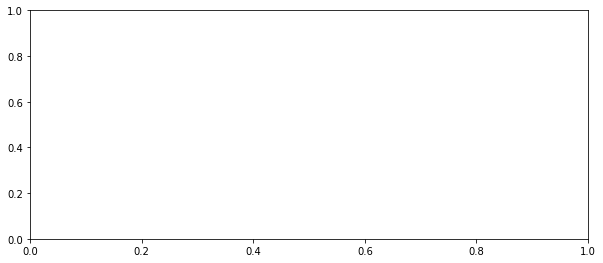

In [ ]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.01, True)

N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.75, False)
plt.show()

## **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!ls "My drive/Data/mobile_cleaned.csv"

ls: cannot access 'My drive/Data/mobile_cleaned.csv': No such file or directory


In [ ]:
pwd

'/content'

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Data/mobile_cleaned.csv')

In [ ]:
df.shape

(341, 88)

In [ ]:
df.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [ ]:
X=df.drop('Rating',axis=1)
Y=df['Rating'].values
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [ ]:
threshold=4.2 #@param {type: "slider", min: 3, max: 5,step:0.1}
df['Class']=(df['Rating']>=threshold).astype(np.int)

In [ ]:
df['Class'].value_counts()

0    182
1    159
Name: Class, dtype: int64

In [ ]:
df['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [ ]:
Y_bainarised=df['Class'].values
Y_bainarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## **standarization**

In [ ]:
R=np.random.random([100,1])
#R

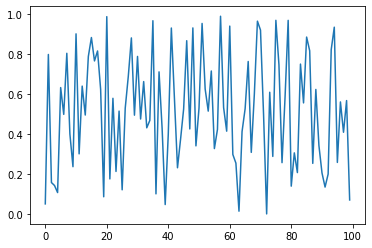

In [ ]:
plt.plot(R)
plt.show()

In [ ]:
np.mean(R)

0.5198548131177132

In [ ]:
np.std(R)

0.2784990339215325

In [ ]:
scalar= StandardScaler()

In [ ]:
scalar.fit(R)

StandardScaler()

In [ ]:
scalar.mean_

array([0.51985481])

In [ ]:
RT=scalar.transform(R)

In [ ]:
np.mean(RT)

-3.552713678800501e-17

In [ ]:
np.std(RT)

1.0

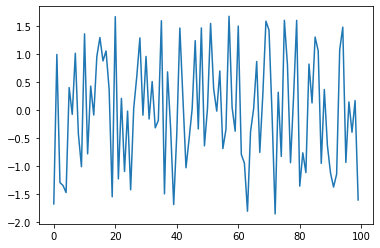

In [ ]:
plt.plot(RT)
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_bainarised)

In [ ]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [ ]:
scalar=StandardScaler()


In [ ]:
x_scaled_train=scalar.fit_transform(X_train)
x_scaled_test=scalar.transform(X_test)

In [ ]:
minmax_scaler = MinMaxScaler()

In [ ]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [ ]:
np.min(Y_scaled_train)

0.0

In [ ]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [ ]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]
scaled_threshold

0.6800000000000002

In [ ]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int")
#Y_binarised_train

In [ ]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

In [ ]:
sn=SigmoidNeuron()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/10000 [00:00<?, ?epoch/s]

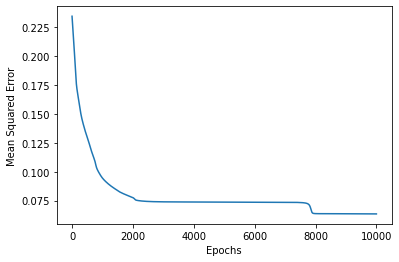

In [ ]:
sn.fit(x_scaled_train,Y_scaled_train,epochs=10000,learning_rate=.002,display_loss=True)

In [ ]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

NameError: ignored

In [ ]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [ ]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [ ]:
print(accuracy_train, accuracy_test)